In [1]:
# Import numerics and plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import underlying code base
import example
import hilbert_map
import util
import occupancy_gridmap

# Make plots interactive
%matplotlib notebook
matplotlib.rcParams["figure.dpi"] = 150

# Configure global variables
g_logpath = "datasets/intel.gfs.log"
g_noise_variances = None
# noise_variances = [0.1, 0.1, 0.02]

# Data loading

Loads the logfile and then visualizes the laser scans in a global coordinate frame.

<IPython.core.display.Javascript object>


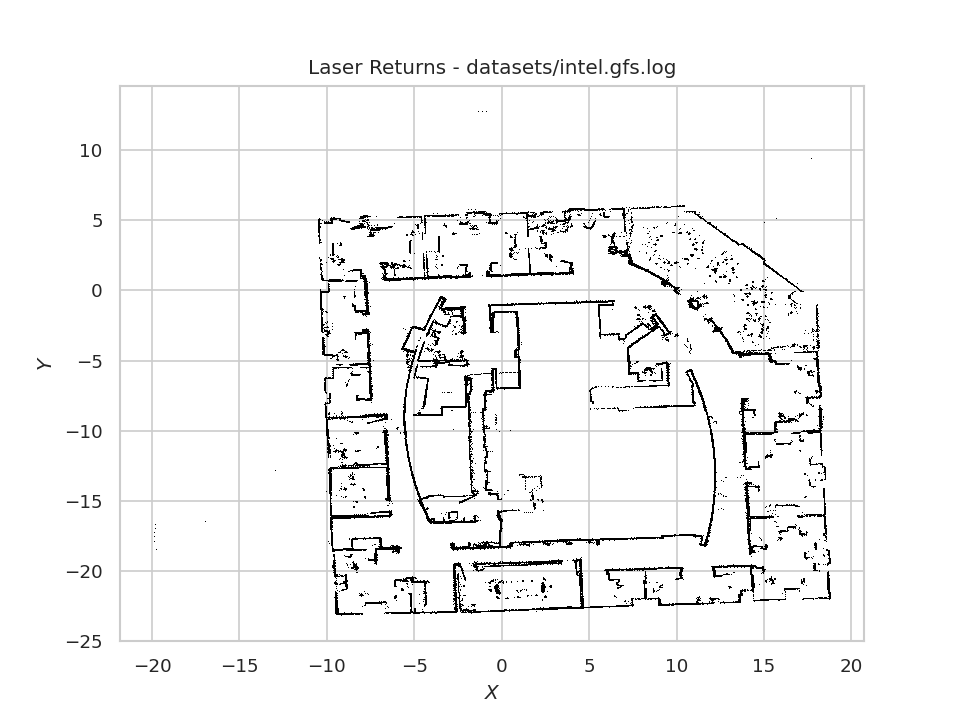

In [2]:
poses, scans = util.parse_carmen_log(g_logpath)
if g_noise_variances is not None:
    poses = util.perturb_data(poses, g_noise_variances)
dataset = {"poses": poses, "scans": scans}

plt.figure("raw data")
plt.title(f"Laser Returns - {g_logpath}")
plt.xlabel("$X$")
plt.ylabel("$Y$")
for points, labels in util.data_generator(poses, scans):
    plt.plot(points[labels == 1][:, 0], points[labels == 1][:, 1], "k,")
plt.show()

# Occupancy Grid Mapping

Using the occupancy grid mapping method using a simple counting sensor model build a map.

<IPython.core.display.Javascript object>


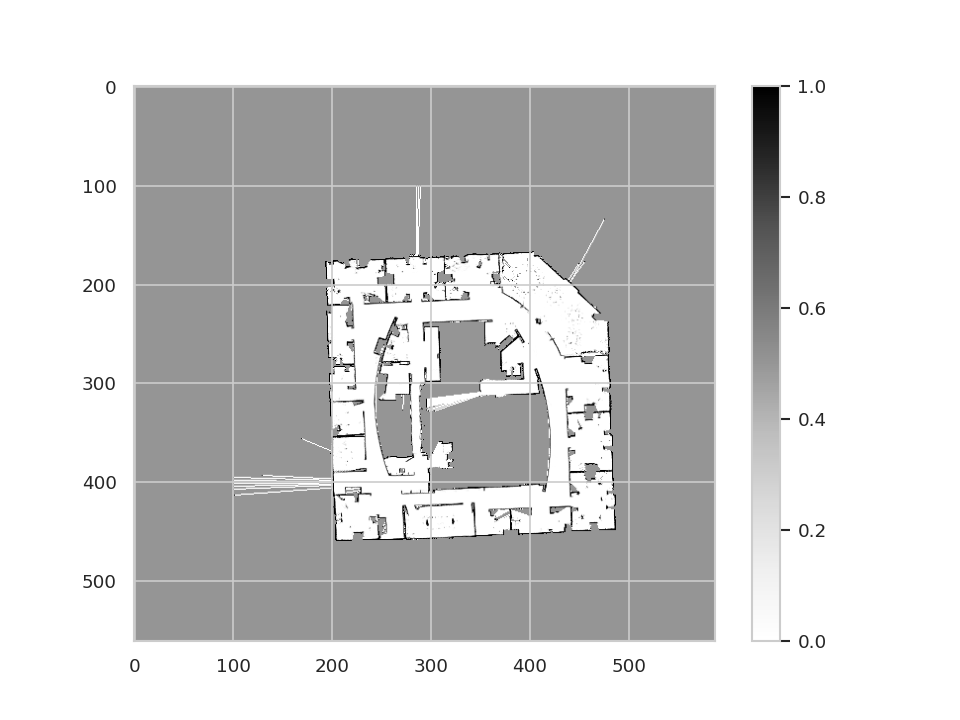

In [3]:
ogm = occupancy_gridmap.create_occupancy_grid_map(dataset, 0.2)
plt.figure("ogm")
ogm.visualize_map()
plt.show()

# Hilbert Map

Treating the problem as a classification one a Hilbert Map is learned from the scans.

Training model:  99.89%


<IPython.core.display.Javascript object>


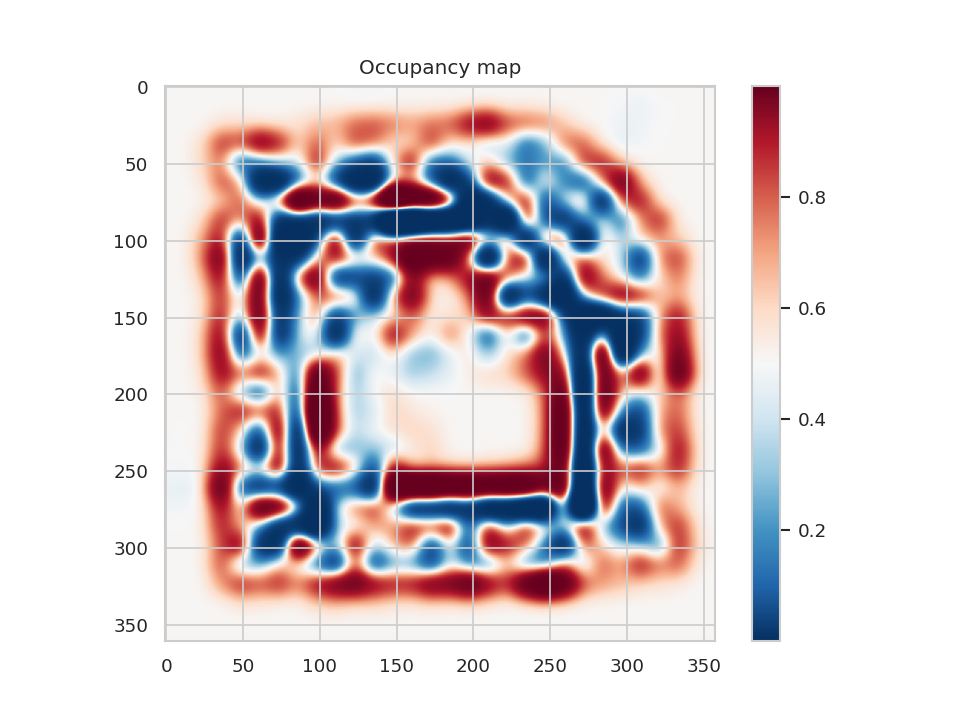

Querying model:  99.97%


In [4]:
hm = example.train_sparse_hm(dataset, 1500, 1.0, 0.001)
xlim, ylim = util.bounding_box(dataset["poses"], 5.0)
plt.figure("hm")
example.generate_map(hm, 0.1, [xlim[0], xlim[1], ylim[0], ylim[1]])
plt.show()